In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df[df.isnull()]

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
null_frame = pd.DataFrame(df.isnull().sum(), columns = ["Null Count"])
null_list = null_frame[null_frame["Null Count"] > 0].index
#total entries = 59381
null_frame[null_frame["Null Count"] > 0]

,Null Count
Employment_Info_1,19
Employment_Info_4,6779
Employment_Info_6,10854
Insurance_History_5,25396
Family_Hist_2,28656
Family_Hist_3,34241
Family_Hist_4,19184
Family_Hist_5,41811
Medical_History_1,8889
Medical_History_10,58824


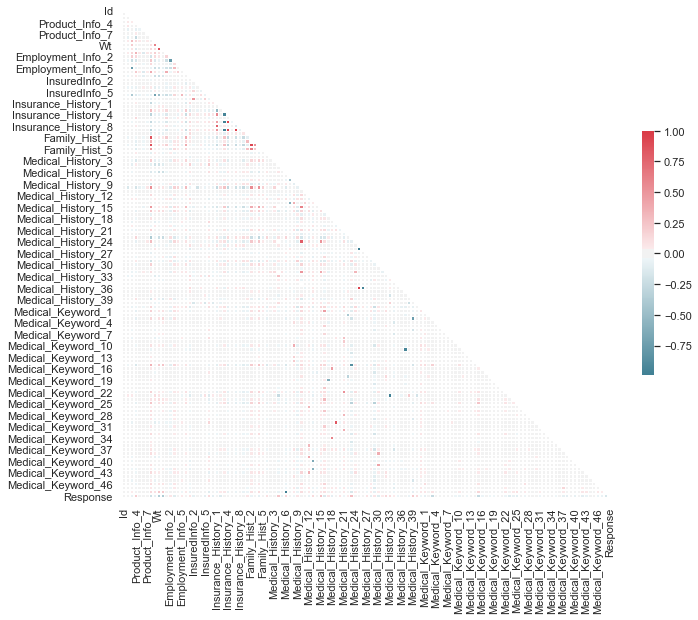

In [5]:
sns.set(style="white")


# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [6]:
df.columns

Index(['Id', 'Product_Info_1', 'Product_Info_2', 'Product_Info_3',
       'Product_Info_4', 'Product_Info_5', 'Product_Info_6', 'Product_Info_7',
       'Ins_Age', 'Ht',
       ...
       'Medical_Keyword_40', 'Medical_Keyword_41', 'Medical_Keyword_42',
       'Medical_Keyword_43', 'Medical_Keyword_44', 'Medical_Keyword_45',
       'Medical_Keyword_46', 'Medical_Keyword_47', 'Medical_Keyword_48',
       'Response'],
      dtype='object', length=128)

In [7]:
x = df.drop(columns = ['Response'])

In [8]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]  #change value if needed
# x.drop(columns=to_drop,inplace = True) #put inplace or not inplace for finalizing drops
to_drop

['Insurance_History_7',
 'Insurance_History_9',
 'Medical_History_26',
 'Medical_History_36',
 'Medical_Keyword_11',
 'Medical_Keyword_23',
 'Medical_Keyword_48']

In [9]:
to_drop #0.85

['Insurance_History_7',
 'Insurance_History_9',
 'Medical_History_26',
 'Medical_History_36',
 'Medical_Keyword_11',
 'Medical_Keyword_23',
 'Medical_Keyword_48']

In [10]:
to_drop #0.9

['Insurance_History_7',
 'Insurance_History_9',
 'Medical_History_26',
 'Medical_History_36',
 'Medical_Keyword_11',
 'Medical_Keyword_23',
 'Medical_Keyword_48']

In [11]:
x = pd.Series([1,1,1,2,3,4,],[5,5,5,5,5,5])

In [12]:
x

5    1
5    1
5    1
5    2
5    3
5    4
dtype: int64

In [13]:
X = pd.read_csv('train.csv')

In [14]:
X.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,8


In [15]:
X[X['Employment_Info_1'].isna()]['Employment_Info_1'].isna()

150      True
528      True
3063     True
8838     True
9738     True
12372    True
14341    True
24377    True
27205    True
28634    True
28905    True
32212    True
35909    True
36381    True
37860    True
39401    True
39949    True
41823    True
57646    True
Name: Employment_Info_1, dtype: bool

In [16]:
X[X['Employment_Info_6'].isna()]['Employment_Info_6'].isna()

0        True
12       True
15       True
18       True
27       True
         ... 
59356    True
59371    True
59373    True
59378    True
59379    True
Name: Employment_Info_6, Length: 10854, dtype: bool

In [17]:
X[X['Insurance_History_5'].isna()]['Insurance_History_5'].isna()

2        True
3        True
4        True
11       True
13       True
         ... 
59375    True
59376    True
59378    True
59379    True
59380    True
Name: Insurance_History_5, Length: 25396, dtype: bool

In [18]:
def impute_employ(X,column):
    return X[column].mean()

In [19]:
for column in ['Employment_Info_1','Employment_Info_4','Employment_Info_6','Insurance_History_5']:
    conditions = [ X[column].isnull()]
    out = [impute_employ(X,column)]
    X[column] = np.select(conditions,out,X[column])
    

In [20]:
X[X['Employment_Info_1'].isna()]['Employment_Info_1'].isna().count()

0

In [21]:
X[X['Employment_Info_6'].isna()]['Employment_Info_6'].isna().count()

0

In [22]:
X[X['Insurance_History_5'].isna()]['Insurance_History_5'].isna().count()

0

In [23]:
X.loc[[150,528,3063],'Employment_Info_1']

150     0.077582
528     0.077582
3063    0.077582
Name: Employment_Info_1, dtype: float64

In [24]:
X.loc[[0,12,15],'Employment_Info_6']

0     0.361469
12    0.361469
15    0.361469
Name: Employment_Info_6, dtype: float64

In [25]:
X.loc[[2,3,4],'Insurance_History_5']

2    0.001733
3    0.001733
4    0.001733
Name: Insurance_History_5, dtype: float64

In [26]:
X[['Employment_Info_1','Employment_Info_6','Insurance_History_5']].describe()

,Employment_Info_1,Employment_Info_6,Insurance_History_5
count,59381.000000,59381.000000,59381.000000
mean,0.077582,0.361469,0.001733
std,0.082334,0.315993,0.005551
min,0.000000,0.000000,0.000000
25%,0.035000,0.100000,0.000667
50%,0.060000,0.350000,0.001733
75%,0.100000,0.500000,0.001733
max,1.000000,1.000000,1.000000


In [27]:
len(X['Insurance_History_5'])

59381

# Trying transformations for pipeline

In [30]:
X['New'] = X[['Family_Hist_2','Family_Hist_3','Family_Hist_4','Family_Hist_5']].mean(axis = 1, skipna= True)

In [31]:
X[['Family_Hist_2','Family_Hist_3','Family_Hist_4','Family_Hist_5','New']].head()

,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,New
0,NaN,0.598039,NaN,0.526786,0.562412
1,0.188406,NaN,0.084507,NaN,0.136456
2,0.304348,NaN,0.225352,NaN,0.264850
3,0.420290,NaN,0.352113,NaN,0.386201
4,0.463768,NaN,0.408451,NaN,0.436109


In [32]:
X[X['New'].isna()][['Family_Hist_2','Family_Hist_3','Family_Hist_4','Family_Hist_5','New','Response']]['Response'].value_counts()

8    292
6    194
1    180
2    138
5    134
7    126
4     28
3     22
Name: Response, dtype: int64

In [33]:
X[X['Product_Info_1'] == 13]

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response,New


In [34]:
test = pd.read_csv('test.csv')

In [35]:
[1, 13,34,5]

[1, 13, 34, 5]

In [36]:
copy = X.copy()

In [37]:
cats = [x.strip('\n') for x in 'Product_Info_1, Product_Info_2, Product_Info_3, Product_Info_5, Product_Info_6, Product_Info_7, Employment_Info_2, Employment_Info_3, Employment_Info_5, InsuredInfo_1, InsuredInfo_2, InsuredInfo_3, InsuredInfo_4, InsuredInfo_5, InsuredInfo_6, InsuredInfo_7, Insurance_History_1, Insurance_History_2, Insurance_History_3, Insurance_History_4, Insurance_History_7, Insurance_History_8, Insurance_History_9, Family_Hist_1, Medical_History_2, Medical_History_3, Medical_History_4, Medical_History_5, Medical_History_6, Medical_History_7, Medical_History_8, Medical_History_9, Medical_History_11, Medical_History_12, Medical_History_13, Medical_History_14, Medical_History_16, Medical_History_17, Medical_History_18, Medical_History_19, Medical_History_20, Medical_History_21, Medical_History_22, Medical_History_23, Medical_History_25, Medical_History_26, Medical_History_27, Medical_History_28, Medical_History_29, Medical_History_30, Medical_History_31, Medical_History_33, Medical_History_34, Medical_History_35, Medical_History_36, Medical_History_37, Medical_History_38, Medical_History_39, Medical_History_40, Medical_History_41'.split(', ')]
cont = 'Product_Info_4, Ins_Age, Ht, Wt, BMI, Employment_Info_1, Employment_Info_4, Employment_Info_6, Insurance_History_5, Family_Hist_2, Family_Hist_3, Family_Hist_4, Family_Hist_5'.split(', ')
disc = 'Medical_History_1, Medical_History_10, Medical_History_15, Medical_History_24, Medical_History_32'.split(', ')

In [38]:
columns = cats

In [39]:
a = pd.get_dummies(data = df, columns = columns, prefix = columns,drop_first = True)

In [40]:
a.head()

,Id,Product_Info_4,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_4,Employment_Info_6,Insurance_History_5,...,Medical_History_36_3,Medical_History_37_2,Medical_History_37_3,Medical_History_38_2,Medical_History_39_2,Medical_History_39_3,Medical_History_40_2,Medical_History_40_3,Medical_History_41_2,Medical_History_41_3
0,2,0.076923,0.641791,0.581818,0.148536,0.323008,0.028,0.0,NaN,0.000667,...,0,1,0,0,0,1,0,1,0,1
1,5,0.076923,0.059701,0.600000,0.131799,0.272288,0.000,0.0,0.0018,0.000133,...,0,1,0,0,0,1,0,1,0,0
2,6,0.076923,0.029851,0.745455,0.288703,0.428780,0.030,0.0,0.0300,NaN,...,1,1,0,0,0,1,0,1,0,0
3,7,0.487179,0.164179,0.672727,0.205021,0.352438,0.042,0.0,0.2000,NaN,...,0,1,0,0,0,1,0,1,0,0
4,8,0.230769,0.417910,0.654545,0.234310,0.424046,0.027,0.0,0.0500,NaN,...,1,1,0,0,0,1,0,1,0,0


In [41]:
# Create correlation matrix
corr_matrix = a.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]  #change value if needed
# x.drop(columns=to_drop,inplace = True) #put inplace or not inplace for finalizing drops
to_drop

['Employment_Info_5_3',
 'Insurance_History_4_3',
 'Insurance_History_7_3',
 'Insurance_History_8_2',
 'Insurance_History_9_2',
 'Insurance_History_9_3',
 'Family_Hist_1_3',
 'Medical_History_3_3',
 'Medical_History_6_3',
 'Medical_History_12_3',
 'Medical_History_14_2',
 'Medical_History_17_3',
 'Medical_History_26_2',
 'Medical_History_26_3',
 'Medical_History_30_3',
 'Medical_History_33_3',
 'Medical_History_35_2',
 'Medical_History_36_2',
 'Medical_History_36_3',
 'Medical_History_37_2',
 'Medical_History_39_2']

In [42]:
X.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response,New
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,8,0.562412
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,4,0.136456
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,8,0.264850
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,8,0.386201
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,8,0.436109
